In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
#read in data
bikes = pd.read_csv('hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 1. Remove columns that do not add any useful information

In [10]:
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual','registered'],axis=1)
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


#### Basic analysis - check nulls

In [12]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

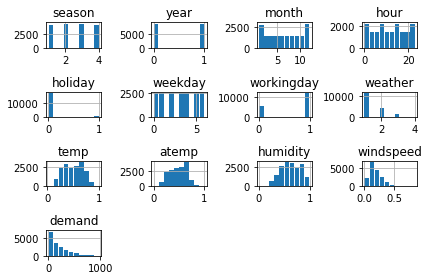

In [15]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

### Data Notes 
- Demand is not normally distributed

#### Continuous Variables data visualization

0 temp
1 atemp
2 humidity
3 windspeed


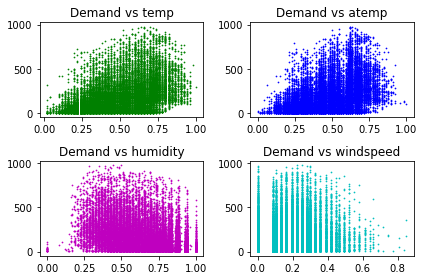

In [28]:
continuous_varibles = ['temp','atemp','humidity','windspeed']
colors = ['g','b','m','c']

#plot the various varibles
for i,var in enumerate(continuous_varibles):
    plt.subplot(2,2,i+1)
    plt.title(f"Demand vs {var}")
    plt.scatter(bikes_prep[var], bikes_prep.demand,s=0.5,c=colors[i])
    plt.tight_layout()

#### Categorical Varibles Visualization

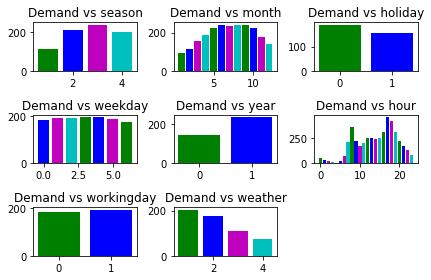

In [35]:
categorical_varibles = ['season','month','holiday','weekday','year','hour','workingday','weather']
colors = ['g','b','m','c']

#plot the various varibles
for i,var in enumerate(categorical_varibles):
    plt.subplot(3,3,i+1)
    cat_list = bikes_prep[var].unique()
    cat_average = bikes_prep.groupby(var).mean()['demand']
    plt.title(f"Demand vs {var}")
    plt.bar(cat_list, cat_average,color=colors)
    plt.tight_layout()
    
